In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 35.2MB/s 
     |████████████████████████████████| 4.3MB 38.4MB/s 


In [4]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 3.3MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D,MaxPool2D,Dropout


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [10]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
classes_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
X_train.max()

255

In [0]:
X_train=X_train/255.0

In [0]:
X_test=X_test/255.0

In [19]:
X_train.shape

(50000, 32, 32, 3)

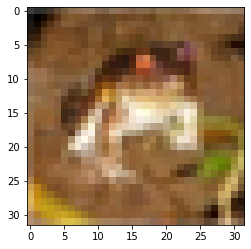

In [20]:
plt.imshow(X_train[0])

In [22]:
y_train[0] # It is class 6, which represents a  frog.

array([6], dtype=uint8)

# **Building a CNN Model**

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))#incase of valid padding, it tries to reduce the dimensions, if 'same' padding would keep the same dimensions.
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [33]:
history=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_test,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 220s 4ms/sample - loss: 1.4100 - sparse_categorical_accuracy: 0.4948 - val_loss: 1.1097 - val_sparse_categorical_accuracy: 0.6026
Epoch 2/10
50000/50000 [==============================] - 223s 4ms/sample - loss: 1.0899 - sparse_categorical_accuracy: 0.6141 - val_loss: 1.0099 - val_sparse_categorical_accuracy: 0.6437
Epoch 3/10
50000/50000 [==============================] - 222s 4ms/sample - loss: 0.9592 - sparse_categorical_accuracy: 0.6595 - val_loss: 0.9654 - val_sparse_categorical_accuracy: 0.6570
Epoch 4/10
50000/50000 [==============================] - 219s 4ms/sample - loss: 0.8774 - sparse_categorical_accuracy: 0.6893 - val_loss: 0.9105 - val_sparse_categorical_accuracy: 0.6796
Epoch 5/10
50000/50000 [==============================] - 225s 4ms/sample - loss: 0.8107 - sparse_categorical_accuracy: 0.7124 - val_loss: 0.9112 - val_sparse_categorical_accuracy: 0.6762
Epoch 6/10

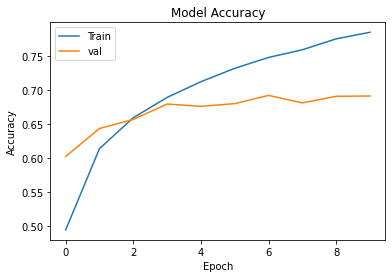

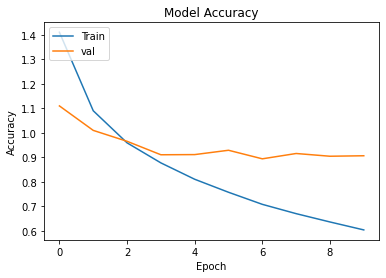

In [42]:
epoch_range=range(1,11)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()


epoch_range=range(1,11)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'],loc='upper left')
plt.show()

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred=model.predict_classes(X_test)

In [57]:
y_pred[1]

8

In [58]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat=confusion_matrix(y_test,y_pred)

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f048132add8>)

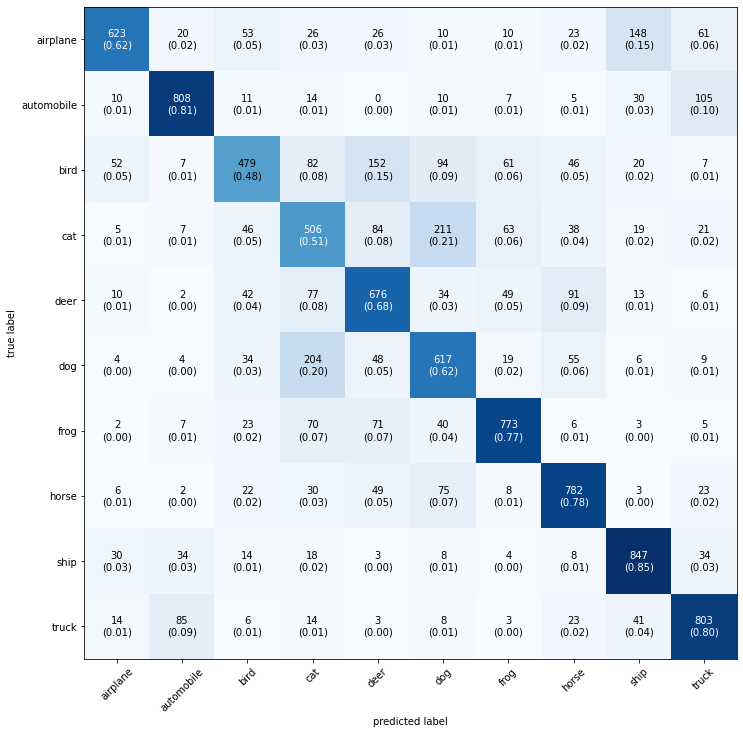

In [67]:
plot_confusion_matrix(mat,figsize=(12,12),show_normed=True,class_names=classes_name)

# The class ship,truck,automobile have the highest correct classifications.

# Bird, Dog and Cat have lowest accuracy.